In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
print(train.columns)
train.head(10)

Index(['Name', 'Category', 'Brand', 'Seller', 'Color', 'Comments',
       'Final price', 'Max price', 'Min price', 'Average price', 'Sales',
       'Days in stock', 'Days with sales', 'Rating', 'Basic Sale',
       'Basic Sale Price', 'Base price', 'full_category'],
      dtype='object')


,Name,Category,Brand,Seller,Color,Comments,Final price,Max price,Min price,Average price,Sales,Days in stock,Days with sales,Rating,Basic Sale,Basic Sale Price,Base price,full_category
0,Машина посудомоечная SPS4HMI3FR,/Крупная бытовая техника,Bosch,ВАЙЛДБЕРРИЗ ООО,NaN,0.0,44990.0,44990.0,38120.0,41555.000000,2.0,23.0,2,"0,0000",0.0,44990.0,44990.0,Бытовая техника/Крупная бытовая техника
1,Триммер,/Красота и здоровье/Бритвы и триммеры/Триммеры,Red Beard,Петрова Елена Владимировна ИП,NaN,5.0,799.0,799.0,799.0,799.000000,4.0,4.0,3,"5,0000",50.0,975.0,1950.0,Бытовая техника/Красота и здоровье/Бритвы и тр...
2,Цифровой термометр-гигрометр с часами TA218A,/Красота и здоровье/Медицинские приборы/Термом...,Данилов Иван Валерьевич ИП,Данилов Иван Валерьевич ИП,NaN,0.0,550.0,550.0,550.0,550.000000,2.0,5.0,2,"0,0000",0.0,579.0,579.0,Бытовая техника/Красота и здоровье/Медицинские...
3,Экономитель воды с регулировкой струи,/Техника для дома,RIPOMA,ГЛОБАЛ ООО,NaN,1.0,127.0,259.0,127.0,127.000000,1.0,27.0,1,"2,0000",70.0,159.0,532.0,Бытовая техника/Техника для дома
4,Мультиварка,/Техника для кухни/Приготовление блюд/Мультиварки,ARC,АРК-2 ООО,NaN,4.0,4651.0,4651.0,4217.0,4595.595745,47.0,20.0,18,"5,0000",25.0,4651.0,6202.0,Бытовая техника/Техника для кухни/Приготовлени...
5,Насадка для пылесоса 30MU09,/Техника для дома/Аксессуары для пылесосов/Нас...,Dr.Electro,ДОКТОР ЭЛЕКТРО ООО,NaN,0.0,736.0,800.0,736.0,749.714286,14.0,19.0,12,"0,0000",54.0,736.0,1600.0,Бытовая техника/Техника для дома/Аксессуары дл...
6,Кухонные весы,/Техника для кухни/Кухонные весы,Аксинья,АМ-СБЫТ ООО,NaN,13.0,554.0,554.0,515.0,541.000000,9.0,31.0,7,"3,0000",40.0,554.0,924.0,Бытовая техника/Техника для кухни/Кухонные весы
7,Переключатель двухклавишный 3 выхода (ЕвроСтан...,/Техника для дома,Daesung,ЭКОГАРАНТ ООО,NaN,4.0,276.0,410.0,217.0,290.500000,16.0,28.0,8,"4,0000",25.0,307.0,410.0,Бытовая техника/Техника для дома
8,Выпрямитель волос SHE1101/210 °C,"/Красота и здоровье/Фены, приборы для укладки/...",StarWind,ВАЙЛДБЕРРИЗ ООО,NaN,45.0,655.0,678.0,655.0,673.656250,32.0,31.0,19,"4,0000",42.0,655.0,1130.0,"Бытовая техника/Красота и здоровье/Фены, прибо..."
9,Профессиональный фен GL 4311,"/Красота и здоровье/Фены, приборы для укладки/...",GALAXY,МЕГАПОЛИС (7321314837) ООО,NaN,428.0,968.0,1076.0,904.0,904.000000,1.0,1.0,1,"4,0000",31.0,1076.0,1560.0,"Бытовая техника/Красота и здоровье/Фены, прибо..."


In [982]:
print(test.columns)
test.head(10)

Index(['Id', 'Name', 'Category', 'Brand', 'Seller', 'Color', 'Comments',
       'Final price', 'Max price', 'Min price', 'Average price',
       'Days in stock', 'Days with sales', 'Rating', 'Basic Sale',
       'Basic Sale Price', 'Base price', 'full_category'],
      dtype='object')


,Id,Name,Category,Brand,Seller,Color,Comments,Final price,Max price,Min price,Average price,Days in stock,Days with sales,Rating,Basic Sale,Basic Sale Price,Base price,full_category
0,0,Помпа для воды,/Техника для кухни/Приготовление напитков/Помп...,Majava,Бобров Вячеслав Юрьевич,NaN,2.0,277.0,277.0,250.0,266.290323,16.0,14,"0,0000",50.0,360.0,720.0,Бытовая техника/Техника для кухни/Приготовлени...
1,1,Термопот BN-348,/Техника для кухни/Приготовление напитков/Терм...,Beon,ТЕХПРОМ ООО,NaN,5.0,2211.0,2211.0,2211.0,2211.000000,7.0,8,"3,0000",40.0,2664.0,4440.0,Бытовая техника/Техника для кухни/Приготовлени...
2,2,NEOLUX HLG-69 HEPA фильтр для пылесоса LG,/Техника для дома/Аксессуары для пылесосов/Фил...,NEOLUX,ПКФ НЕВА-ФИЛЬТР ООО,NaN,19.0,490.0,490.0,450.0,476.884615,31.0,22,"5,0000",30.0,490.0,700.0,Бытовая техника/Техника для дома/Аксессуары дл...
3,3,Аппарат для педикюра,/Красота и здоровье/Косметические аппараты/Апп...,CENTEK,ЛИВСИТИ ООО,NaN,2.0,807.0,807.0,807.0,NaN,31.0,0,"4,0000",15.0,807.0,950.0,Бытовая техника/Красота и здоровье/Косметическ...
4,4,Пульт Huayu H-LCD1510 (20LJ02) для телевизоров...,/Техника для дома/Пульты управления/Пульты тел...,HUAYU,Дулгер Дарья Сергеевна ИП,NaN,3.0,426.0,440.0,426.0,426.000000,31.0,5,"5,0000",3.0,426.0,440.0,Бытовая техника/Техника для дома/Пульты управл...
5,5,"Сетевой фильтр MOST ЕRG (5м, белый)",/Техника для дома,МОSТ,КАСТОМЕР ОПТ ООО,NaN,5.0,1262.0,1262.0,1165.0,1192.714286,13.0,12,"5,0000",35.0,1683.0,2590.0,Бытовая техника/Техника для дома
6,6,Массажер электрический воздушно-компрессионный,/Красота и здоровье/Массажеры электрические/Ма...,TvSale,Ахмади Ольга Александровна ИП,NaN,0.0,434.0,434.0,434.0,434.000000,31.0,10,"0,0000",73.0,434.0,1610.0,Бытовая техника/Красота и здоровье/Массажеры э...
7,7,"Аппарат для маникюра и педикюра, ручной фрезер...",/Красота и здоровье/Косметические аппараты/Апп...,Nails4all,Жеребцова Анастасия Александровна ИП,NaN,417.0,538.0,581.0,538.0,552.490842,26.0,28,"4,0000",51.0,882.0,1800.0,Бытовая техника/Красота и здоровье/Косметическ...
8,8,ГАЗОВАЯ ВАРОЧНАЯ ПАНЕЛЬ GS 60.1 WM,/Техника для кухни/Плиты и варочные панели/Вар...,Graude,ХОМАЕР ООО,NaN,0.0,17990.0,17990.0,17990.0,NaN,31.0,0,"0,0000",0.0,17990.0,17990.0,Бытовая техника/Техника для кухни/Плиты и варо...
9,9,Косметический аппарат M-3CN,/Красота и здоровье/Косметические аппараты/Кос...,MARATHON,Смирнов Виталий Игоревич ИП,NaN,2.0,9629.0,9629.0,9629.0,NaN,0.0,0,"5,0000",10.0,9629.0,10699.0,Бытовая техника/Красота и здоровье/Косметическ...


## Preprocess data

### Check correctly filled columns

In [983]:
correct_records_per_column = {column: len(test[column].dropna())/len(test.index)*100 for column in test.columns}.items()
sorted_correct_records = sorted(
    correct_records_per_column,
    key=lambda x: -x[1]
)
sorted_correct_records

[('Id', 100.0),
 ('Name', 100.0),
 ('Category', 100.0),
 ('Brand', 100.0),
 ('Comments', 100.0),
 ('Final price', 100.0),
 ('Max price', 100.0),
 ('Min price', 100.0),
 ('Days in stock', 100.0),
 ('Days with sales', 100.0),
 ('Rating', 100.0),
 ('Basic Sale', 100.0),
 ('Basic Sale Price', 100.0),
 ('Base price', 100.0),
 ('full_category', 100.0),
 ('Seller', 99.93482915929616),
 ('Average price', 77.59054091797785),
 ('Color', 0.6330881668373523)]

### Factorize string columns to prepare data

In [984]:
columns_to_factorize = ['Name', 'Category', 'Brand', 'Seller', 'full_category', 'Color']
train[columns_to_factorize] = train[columns_to_factorize].apply (lambda x: pd.factorize(x)[0])
test[columns_to_factorize] = test[columns_to_factorize].apply (lambda x: pd.factorize(x)[0])

### Change types

In [985]:
train['Rating'] = train['Rating'].apply(lambda x: float(x.replace(',', '.')))
test['Rating'] = test['Rating'].apply(lambda x: float(x.replace(',', '.')))

In [986]:
train['Average price'] = (train['Max price'].astype(float) + train['Min price']) / 2
test['Average price'] = (test['Max price'].astype(float) + test['Min price']) / 2

In [987]:
train.head()

,Name,Category,Brand,Seller,Color,Comments,Final price,Max price,Min price,Average price,Sales,Days in stock,Days with sales,Rating,Basic Sale,Basic Sale Price,Base price,full_category
0,0,0,0,0,-1,0.0,44990.0,44990.0,38120.0,41555.0,2.0,23.0,2,0.0,0.0,44990.0,44990.0,0
1,1,1,1,1,-1,5.0,799.0,799.0,799.0,799.0,4.0,4.0,3,5.0,50.0,975.0,1950.0,1
2,2,2,2,2,-1,0.0,550.0,550.0,550.0,550.0,2.0,5.0,2,0.0,0.0,579.0,579.0,2
3,3,3,3,3,-1,1.0,127.0,259.0,127.0,193.0,1.0,27.0,1,2.0,70.0,159.0,532.0,3
4,4,4,4,4,-1,4.0,4651.0,4651.0,4217.0,4434.0,47.0,20.0,18,5.0,25.0,4651.0,6202.0,4


In [988]:
test.head()

,Id,Name,Category,Brand,Seller,Color,Comments,Final price,Max price,Min price,Average price,Days in stock,Days with sales,Rating,Basic Sale,Basic Sale Price,Base price,full_category
0,0,0,0,0,0,-1,2.0,277.0,277.0,250.0,263.5,16.0,14,0.0,50.0,360.0,720.0,0
1,1,1,1,1,1,-1,5.0,2211.0,2211.0,2211.0,2211.0,7.0,8,3.0,40.0,2664.0,4440.0,1
2,2,2,2,2,2,-1,19.0,490.0,490.0,450.0,470.0,31.0,22,5.0,30.0,490.0,700.0,2
3,3,3,3,3,3,-1,2.0,807.0,807.0,807.0,807.0,31.0,0,4.0,15.0,807.0,950.0,3
4,4,4,4,4,4,-1,3.0,426.0,440.0,426.0,433.0,31.0,5,5.0,3.0,426.0,440.0,4


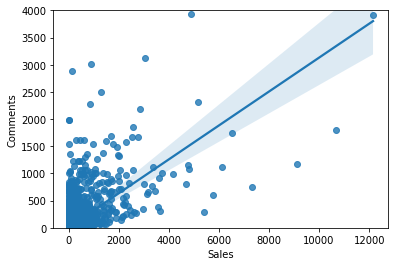

In [989]:
plt.figure()
plt.ylim(0, 4000)
ax = sns.regplot(x=train['Sales'], y=train['Comments'])
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

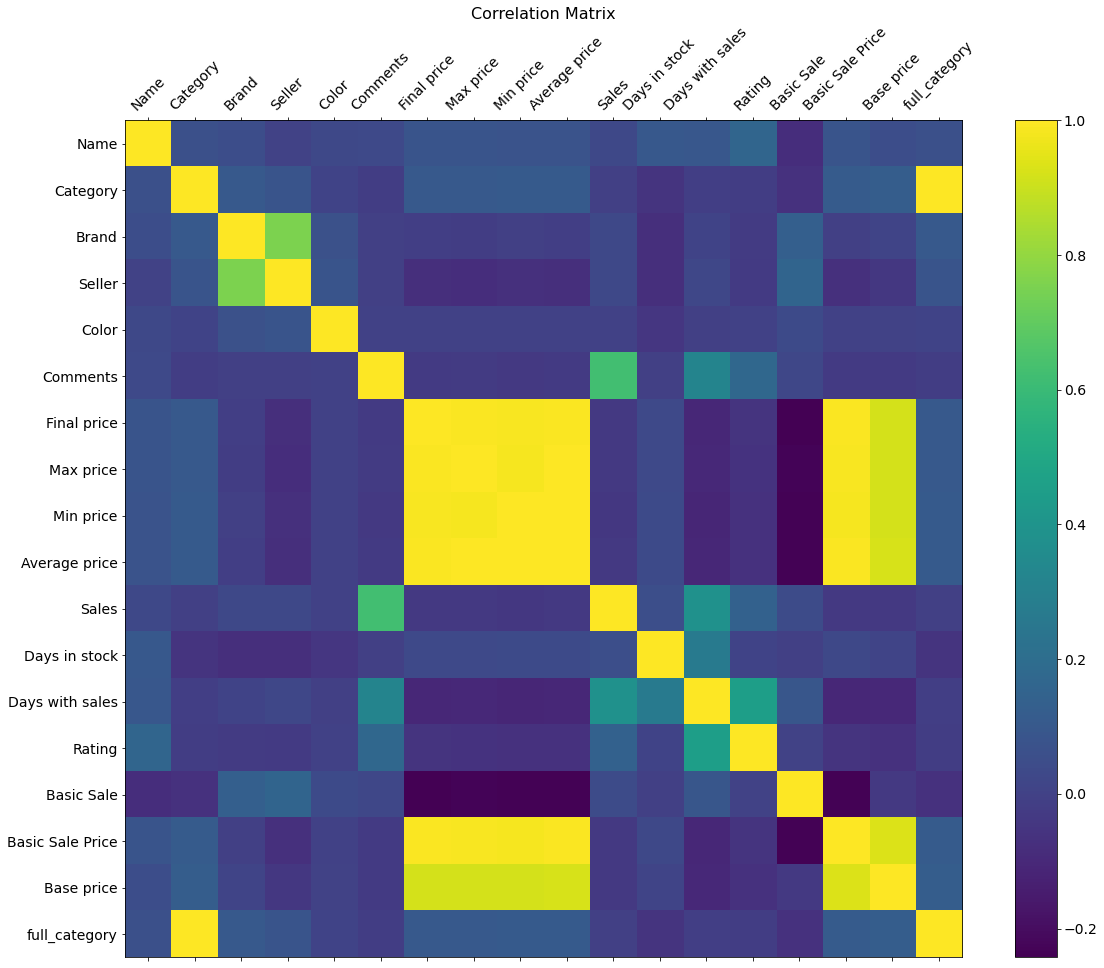

In [990]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(method='pearson'), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

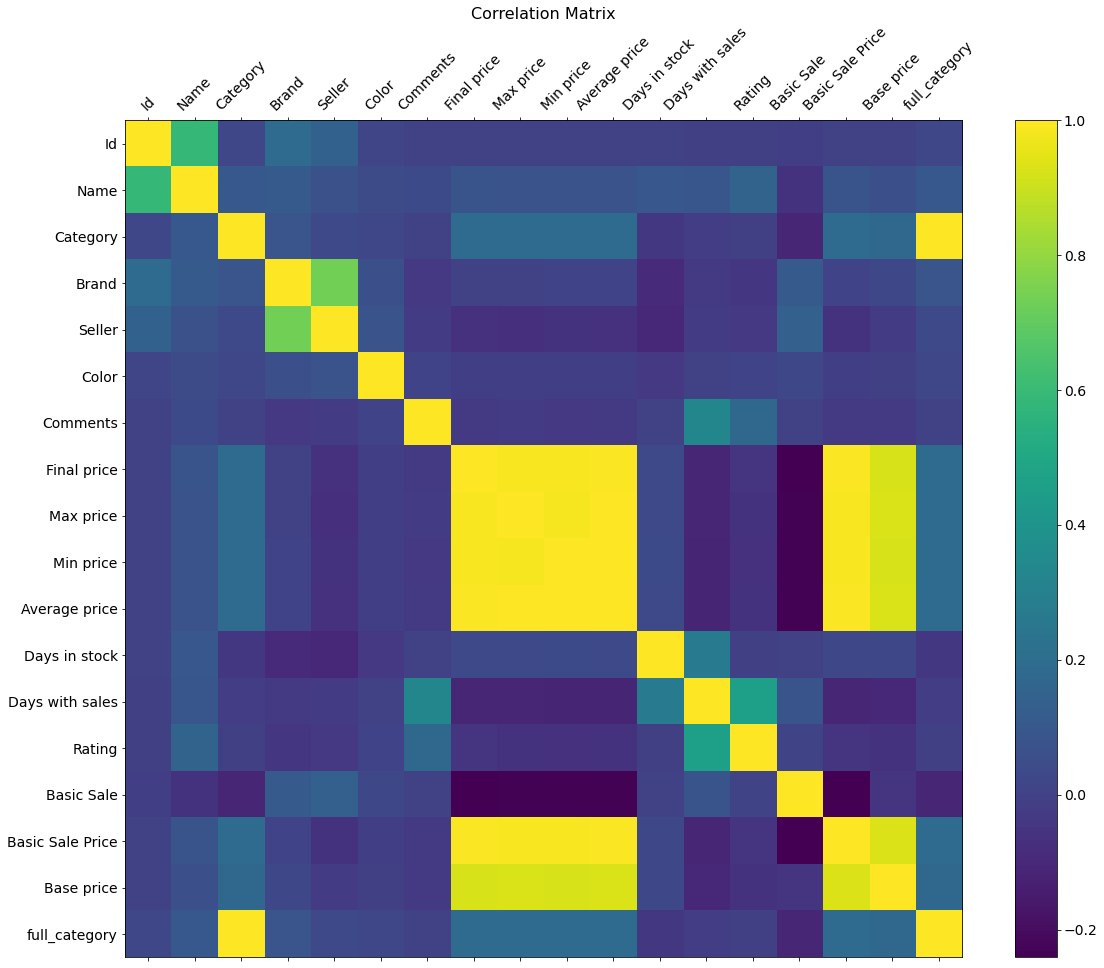

In [991]:
f = plt.figure(figsize=(19, 15))
plt.matshow(test.corr(method='pearson'), fignum=f.number)
plt.xticks(range(test.select_dtypes(['number']).shape[1]), test.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(test.select_dtypes(['number']).shape[1]), test.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Data analysis conclusion
1. Correlation matrix shows absolute dependency between Final, Max, Min, Average and Basic Sale prices. We can keep only one of them.
2. Color filled only for 0.5% of data. We will not analyze this column.

In [992]:
train

,Name,Category,Brand,Seller,Color,Comments,Final price,Max price,Min price,Average price,Sales,Days in stock,Days with sales,Rating,Basic Sale,Basic Sale Price,Base price,full_category
0,0,0,0,0,-1,0.0,44990.0,44990.0,38120.0,41555.0,2.0,23.0,2,0.0,0.0,44990.0,44990.0,0
1,1,1,1,1,-1,5.0,799.0,799.0,799.0,799.0,4.0,4.0,3,5.0,50.0,975.0,1950.0,1
2,2,2,2,2,-1,0.0,550.0,550.0,550.0,550.0,2.0,5.0,2,0.0,0.0,579.0,579.0,2
3,3,3,3,3,-1,1.0,127.0,259.0,127.0,193.0,1.0,27.0,1,2.0,70.0,159.0,532.0,3
4,4,4,4,4,-1,4.0,4651.0,4651.0,4217.0,4434.0,47.0,20.0,18,5.0,25.0,4651.0,6202.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25057,15545,37,150,127,-1,11.0,1985.0,2089.0,1985.0,2037.0,1.0,31.0,1,4.0,24.0,2647.0,3483.0,37
25058,109,37,47,0,-1,5.0,1226.0,2190.0,1226.0,1708.0,4.0,6.0,2,5.0,44.0,1226.0,2190.0,37
25059,15546,112,316,262,-1,2.0,15894.0,18032.0,15894.0,16963.0,3.0,31.0,3,3.0,5.0,17660.0,18590.0,112
25060,15547,21,345,288,-1,0.0,907.0,907.0,907.0,907.0,5.0,28.0,5,0.0,40.0,1068.0,1780.0,21


In [996]:
train.drop(['Name', 'Color', 'Seller', 'Brand', 'Max price', 'Min price', 'Final price', 'Basic Sale', 'full_category', 'Category', 'Comments', 'Rating'], axis=1, inplace=True)
test.drop(['Name', 'Color', 'Seller', 'Brand', 'Max price', 'Min price', 'Final price', 'Basic Sale', 'full_category', 'Category', 'Comments', 'Rating'], axis=1, inplace=True)

In [998]:
train

,Average price,Sales,Days in stock,Days with sales,Basic Sale Price,Base price,Rating Weight
0,41555.0,2.0,23.0,2,44990.0,44990.0,0.0
1,799.0,4.0,4.0,3,975.0,1950.0,25.0
2,550.0,2.0,5.0,2,579.0,579.0,0.0
3,193.0,1.0,27.0,1,159.0,532.0,2.0
4,4434.0,47.0,20.0,18,4651.0,6202.0,20.0
...,...,...,...,...,...,...,...
25057,2037.0,1.0,31.0,1,2647.0,3483.0,44.0
25058,1708.0,4.0,6.0,2,1226.0,2190.0,25.0
25059,16963.0,3.0,31.0,3,17660.0,18590.0,6.0
25060,907.0,5.0,28.0,5,1068.0,1780.0,0.0


## Build and fit model

In [999]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# TODO: Use for feature selection
# from catboost import CatBoostRegressor
# from boruta import BorutaPy

In [1000]:
def smape_loss(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

In [1001]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Sales'], axis=1), train['Sales'], test_size=0.1)

In [1002]:
X_train

,Average price,Days in stock,Days with sales,Basic Sale Price,Base price,Rating Weight
19431,333.5,31.0,1,290.0,377.0,0.0
8892,1052.0,15.0,11,1052.0,2240.0,16.0
6985,604.0,8.0,7,789.0,3290.0,65.0
22657,997.0,31.0,0,997.0,1174.0,45.0
23816,999.0,31.0,3,1333.0,2666.0,12.0
...,...,...,...,...,...,...
17157,297.0,28.0,4,264.0,330.0,2.0
6914,371.0,28.0,0,292.0,450.0,1.0
4474,1123.0,31.0,0,1164.0,2376.0,1.0
5653,18125.0,31.0,0,19500.0,25000.0,0.0


In [1003]:
y_train

19431     1.0
8892     35.0
6985     50.0
22657     0.0
23816     3.0
         ... 
17157     4.0
6914      0.0
4474      0.0
5653      0.0
20558     0.0
Name: Sales, Length: 22555, dtype: float64

## Try Random Forest

In [1004]:
# TODO: Use for feature selection
# selection_model = RandomForestRegressor(verbose = 2, min_samples_leaf = 4, min_samples_split = 8, warm_start = True, n_jobs = -1, criterion='absolute_error', random_state = 42)
# feat_selector = BorutaPy(
#     verbose = 2,
#     estimator = selection_model,
#     n_estimators = 'auto',
#     max_iter = 20
# )
# feat_selector.fit(np.array(X_train), np.array(y_train))

In [1005]:
# TODO: Use for feature selection
# print("\n------Support and Ranking for each feature------")
# for i in range(len(feat_selector.support_)):
#     if feat_selector.support_[i]:
#         print("Passes the test: ", X_train.columns[i],
#               " - Ranking: ", feat_selector.ranking_[i])
#     else:
#         print("Doesn't pass the test: ",
#               X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

In [1007]:
model = RandomForestRegressor(verbose = 2, min_samples_leaf = 4, min_samples_split = 8, warm_start = True, n_jobs = -1, criterion='absolute_error', random_state = 42)

In [1008]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metric = smape_loss(y_test, y_pred)
print(metric)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [915]:
y_pred = model.predict(X_test)
print(sklearn.metrics.r2_score(y_test, y_pred))
print(sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred))
print(smape_loss(y_test, y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


0.6273156518026899
0.2539761948275291
22.117064573315673


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [916]:
test

,Id,Average price,Days in stock,Days with sales,Base price,Rating Weight
0,0,263.5,16.0,14,720.0,0.0
1,1,2211.0,7.0,8,4440.0,15.0
2,2,470.0,31.0,22,700.0,95.0
3,3,807.0,31.0,0,950.0,8.0
4,4,433.0,31.0,5,440.0,15.0
...,...,...,...,...,...,...
10736,10736,19305.5,31.0,3,25690.0,0.0
10737,10737,865.5,12.0,9,2500.0,32.0
10738,10738,2232.0,31.0,29,2899.0,45.0
10739,10739,2752.0,11.0,2,4300.0,0.0


In [917]:
prediction = model.predict(test.drop('Id', axis=1))
result = pd.DataFrame(test['Id'])
result.insert(1, 'Expected', prediction, True)
result['Expected'] = result['Expected'].apply(lambda x: round(x))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [918]:
result.to_csv('../submission/submission.csv', index=False)